<a href="https://colab.research.google.com/github/asrorKholmatov/ML-Engineer-Portfolio/blob/main/Flight_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets

In [ ]:
import pandas as pd
import numpy as np
import opendatasets as od
import os
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 8)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
od.download('https://www.kaggle.com/competitions/aviachipta-narxini-bashorat-qilish')

Skipping, found downloaded files in "./aviachipta-narxini-bashorat-qilish" (use force=True to force download)


In [ ]:
os.listdir('aviachipta-narxini-bashorat-qilish')

['train_data.csv', 'sample_solution.csv', 'test_data.csv']

In [ ]:
df = pd.read_csv('/content/aviachipta-narxini-bashorat-qilish/train_data.csv')
test_df = pd.read_csv('/content/aviachipta-narxini-bashorat-qilish/test_data.csv')
submission_df = pd.read_csv('/content/aviachipta-narxini-bashorat-qilish/sample_solution.csv')

In [ ]:
df.head()

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,1,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212
1,2,SpiceJet,SG-5094,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292
2,3,Vistara,UK-846,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553
3,4,Vistara,UK-706,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28,5760
4,5,Indigo,6E-5394,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4,10712


In [ ]:
test_df.head()

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,1,Air_India,AI-765,Kolkata,Evening,one,Night,Delhi,Business,28.25,2
1,2,Vistara,UK-747,Delhi,Early_Morning,one,Night,Mumbai,Business,13.83,34
2,3,Air_India,AI-570,Mumbai,Early_Morning,zero,Early_Morning,Chennai,Business,2.00,30
3,4,AirAsia,I5-974,Hyderabad,Night,one,Late_Night,Delhi,Economy,5.17,26
4,5,Air_India,AI-770,Kolkata,Night,one,Afternoon,Mumbai,Economy,16.33,35


In [ ]:
df.shape, test_df.shape

((20000, 12), (5000, 11))

<Axes: ylabel='duration'>

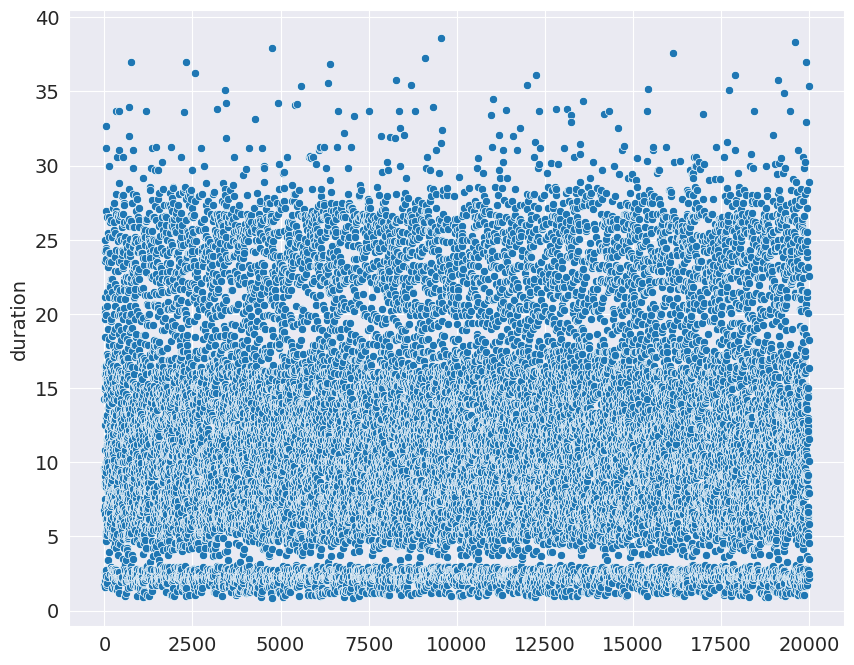

In [ ]:
sns.scatterplot(data=df['duration'])

<Axes: ylabel='price'>

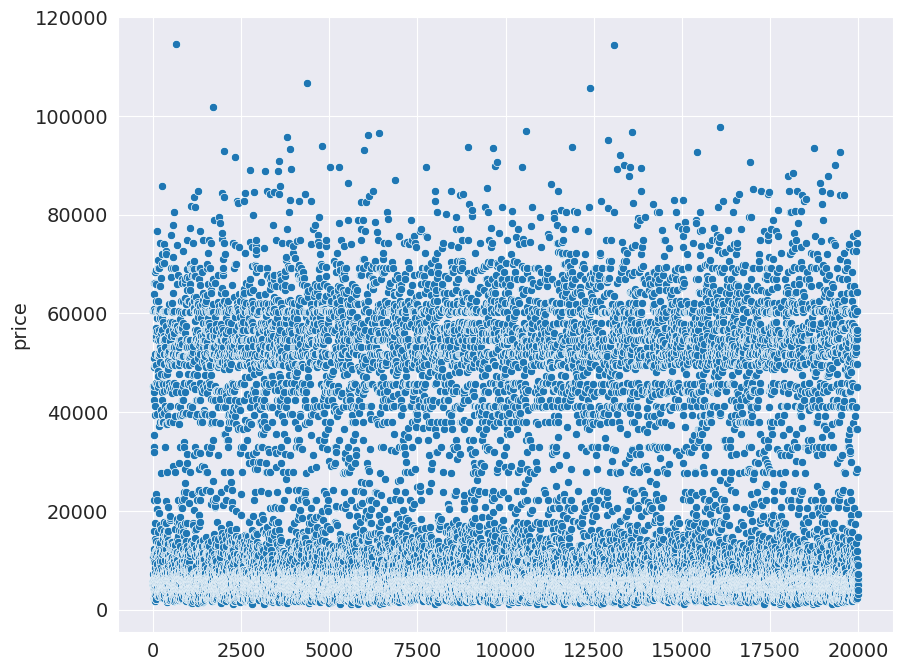

In [ ]:
sns.scatterplot(data=df['price'])

<Axes: xlabel='duration', ylabel='price'>

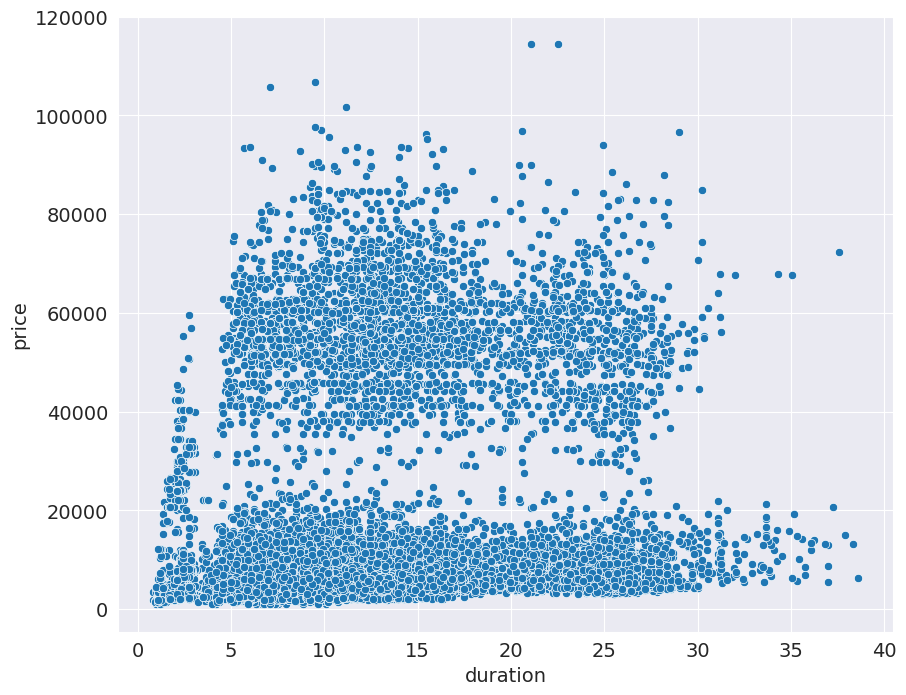

In [ ]:
sns.scatterplot(data=df, x=df['duration'], y=df['price'])

(array([2768., 4095., 4211., 3772., 1692., 1421., 1571.,  366.,   81.,
          23.]),
 array([ 0.83 ,  4.605,  8.38 , 12.155, 15.93 , 19.705, 23.48 , 27.255,
        31.03 , 34.805, 38.58 ]),
 <BarContainer object of 10 artists>)

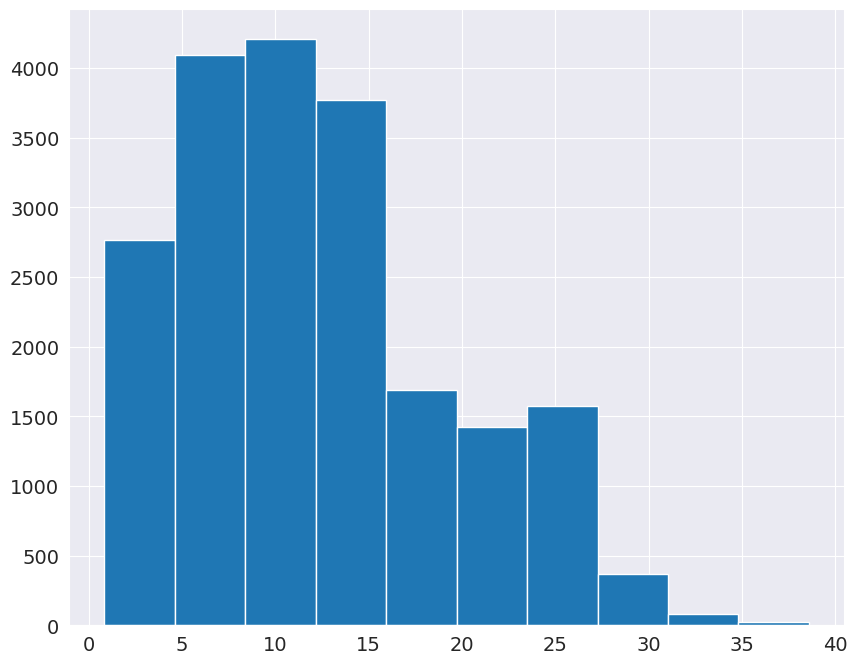

In [ ]:
plt.hist(df['duration'])

(array([1.2642e+04, 1.2600e+03, 4.6100e+02, 1.1740e+03, 2.4000e+03,
        1.5160e+03, 4.1400e+02, 1.1000e+02, 1.9000e+01, 4.0000e+00]),
 array([  1105. ,  12446.8,  23788.6,  35130.4,  46472.2,  57814. ,
         69155.8,  80497.6,  91839.4, 103181.2, 114523. ]),
 <BarContainer object of 10 artists>)

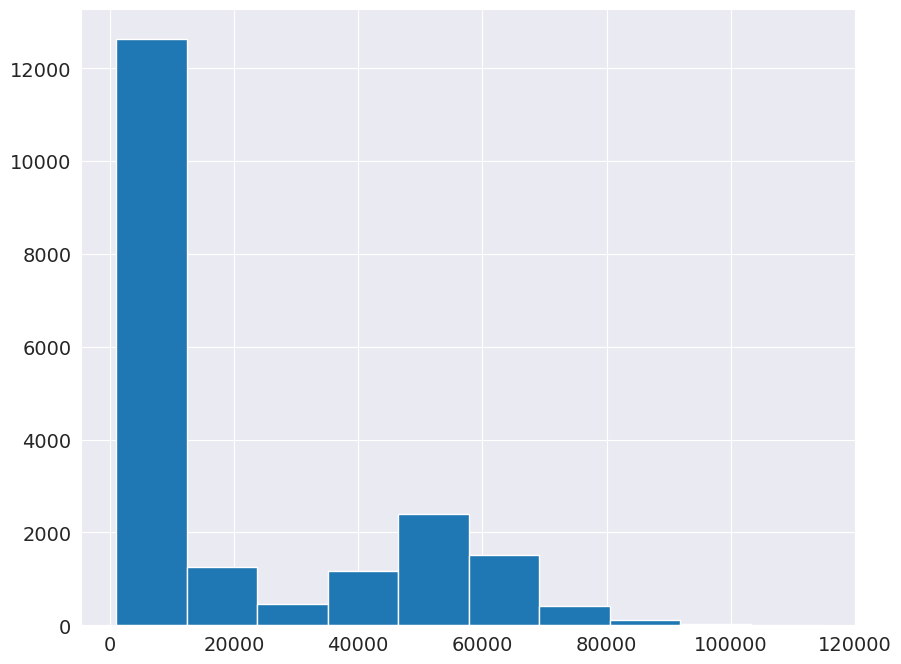

In [ ]:
plt.hist(df['price'])

(array([8535.,    0.,  606.,    0., 2924.,    0., 5371.,    0., 1508.,
        1056.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

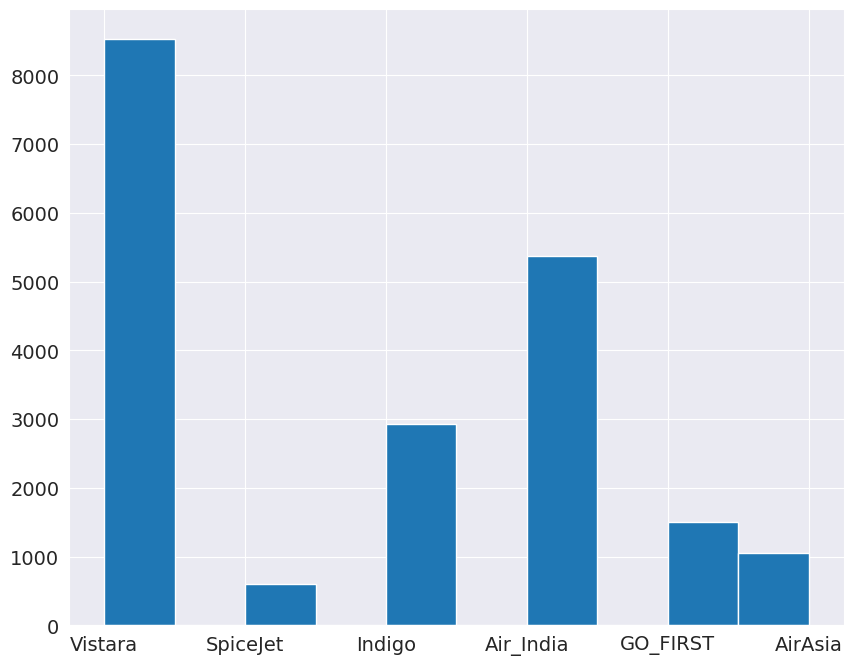

In [ ]:
plt.hist(df['airline'])

(array([7148., 4893., 2507., 1675., 1166.,  848.,  665.,  514.,  377.,
         207.]),
 array([   0. ,  130.9,  261.8,  392.7,  523.6,  654.5,  785.4,  916.3,
        1047.2, 1178.1, 1309. ]),
 <BarContainer object of 10 artists>)

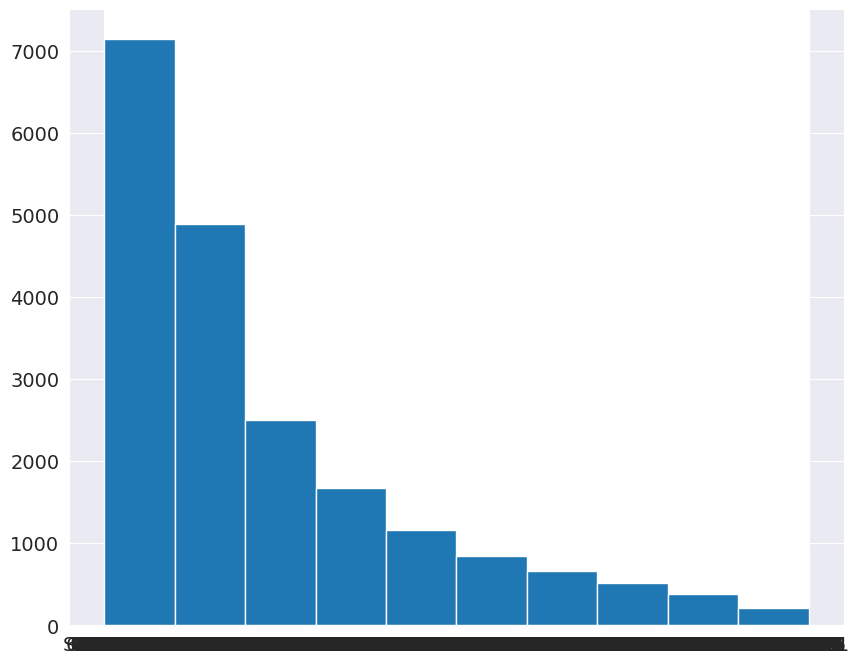

In [ ]:
plt.hist(df['flight'])

(array([4432.,    0., 4341.,    0., 4738.,    0., 3166.,    0., 3231.,
          92.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

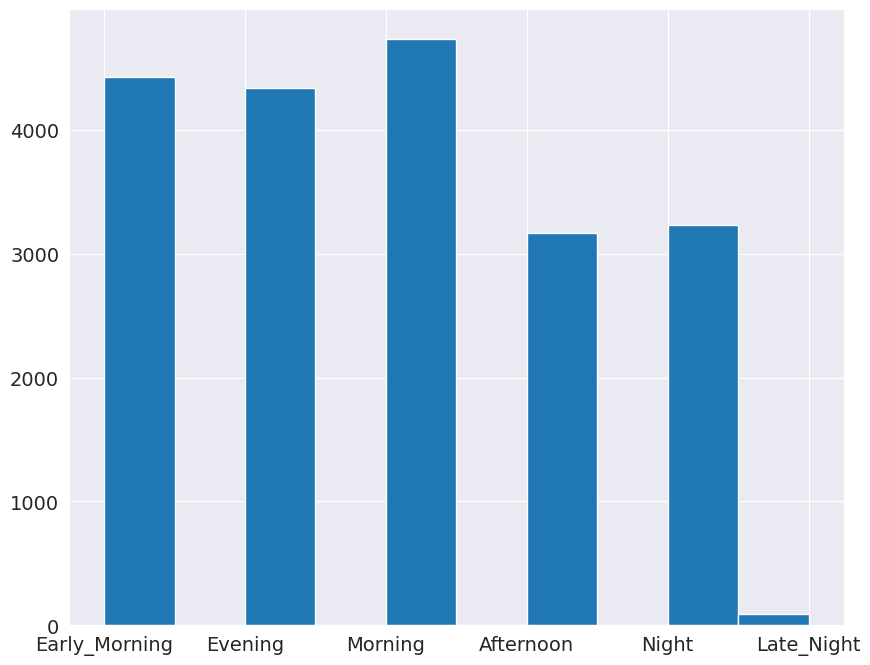

In [ ]:
plt.hist(df['departure_time'])

<Axes: xlabel='duration', ylabel='stops'>

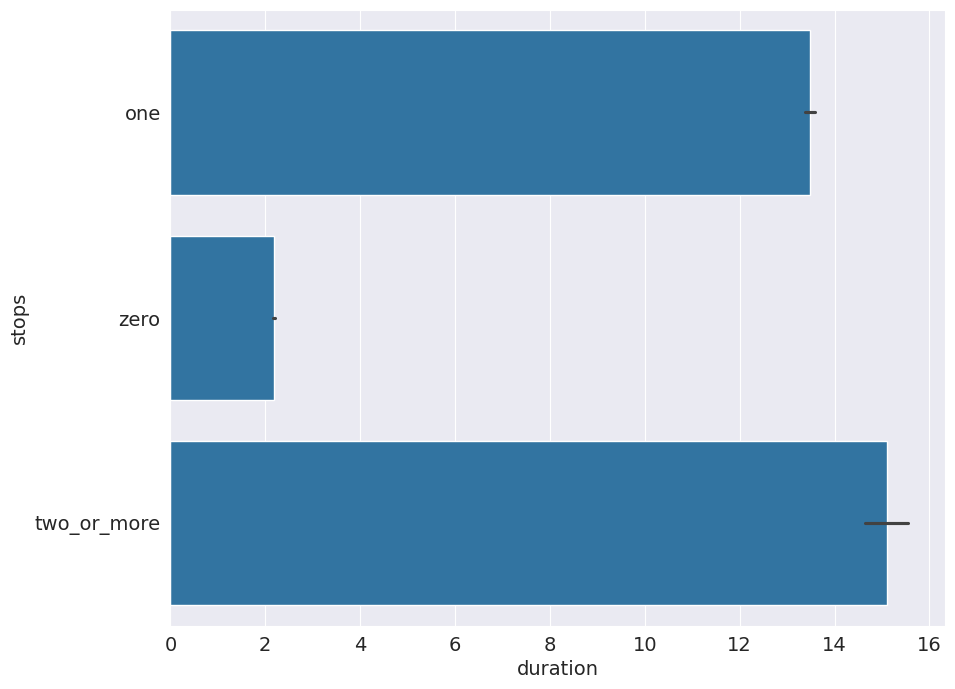

In [ ]:
sns.barplot(data=df, x='duration', y='stops')

In [ ]:
train_df = df[df.columns[1:-1]].copy()
target_df = df['price'].copy()

In [ ]:
target_df

,price
0,7212
1,5292
2,60553
3,5760
4,10712
...,...
19995,3153
19996,3911
19997,14822
19998,6450


In [ ]:
train_df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21
1,SpiceJet,SG-5094,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7
2,Vistara,UK-846,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5
3,Vistara,UK-706,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28
4,Indigo,6E-5394,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4


In [ ]:
train_df['flight_code'] = train_df['flight'].str.extract(r'^([A-Z0-9]+)-')
train_df = train_df.drop('flight', axis=1)
test_df['flight_code'] = test_df['flight'].str.extract(r'^([A-Z0-9]+)-')
test_df = test_df.drop('flight', axis=1)

In [ ]:
numeric_cols = list(train_df.select_dtypes(include=np.number))
categorical_cols = list(train_df.select_dtypes('object'))
print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)

Numeric columns: ['duration', 'days_left']
Categorical columns: ['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class', 'flight_code']


In [ ]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numeric_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ]
)

In [ ]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBRegressor(random_state=42, n_estimators=1000, max_depth=7, learning_rate=0.2, eval_metric='logloss', use_label_encoder=False))
])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestRegressor(max_depth=15, min_samples_split=20, n_estimators=800, n_jobs=-1, random_state=42))
])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_df, target_df, test_size=0.2, random_state=42)

In [ ]:
%%time
model.fit(X_train, y_train)

CPU times: user 8.56 s, sys: 73.1 ms, total: 8.63 s
Wall time: 5.32 s


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['duration', 'days_left']),
                                                 ('cat', OneHotEncoder(),
                                                  ['airline', 'source_city',
                                                   'departure_time', 'stops',
                                                   'arrival_time',
                                                   'destination_city', 'class',
                                                   'flight_code'])])),
                ('classifier',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.2,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=7, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=1000, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
print(X_train.columns)
print(X_test.columns)

Index(['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
       'destination_city', 'class', 'duration', 'days_left', 'flight_code'],
      dtype='object')
Index(['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
       'destination_city', 'class', 'duration', 'days_left', 'flight_code'],
      dtype='object')


In [ ]:
X_pred = model.predict(X_train)

In [ ]:
X_train

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,flight_code
5894,GO_FIRST,Bangalore,Evening,one,Night,Delhi,Economy,4.83,32,G8
3728,Air_India,Hyderabad,Early_Morning,one,Night,Chennai,Business,17.08,39,AI
8958,Vistara,Hyderabad,Afternoon,one,Night,Bangalore,Economy,8.00,11,UK
7671,Air_India,Delhi,Evening,one,Morning,Mumbai,Business,15.25,22,AI
5999,Air_India,Delhi,Morning,one,Afternoon,Mumbai,Business,30.08,9,AI
...,...,...,...,...,...,...,...,...,...,...
11284,Indigo,Hyderabad,Evening,zero,Night,Bangalore,Economy,1.08,5,6E
11964,Vistara,Delhi,Early_Morning,zero,Morning,Kolkata,Economy,2.08,33,UK
5390,Air_India,Delhi,Morning,one,Afternoon,Kolkata,Economy,28.08,6,AI
860,GO_FIRST,Bangalore,Early_Morning,one,Evening,Chennai,Economy,9.67,17,G8


In [ ]:
X_pred = model.predict(X_train)
y_pred = model.predict(X_test)

In [ ]:
def evaluate_model(X, y):
    mae = mean_absolute_error(X, y)
    mse = mean_squared_error(X, y)
    r2 = r2_score(X, y)
    return mae, mse, r2

In [ ]:
evaluate_model(X_pred, y_train), evaluate_model(y_pred, y_test)

((250.896484375, 207752.046875, 0.9995971322059631),
 (2142.46240234375, 13983128.0, 0.9726808667182922))

In [ ]:
((1899.564865122252, 11559694.365922838, 0.9768717995493985),
 (2261.00688311074, 16970908.751220234, 0.9662106520148865))

((1899.564865122252, 11559694.365922838, 0.9768717995493985),
 (2261.00688311074, 16970908.751220234, 0.9662106520148865))

In [ ]:
test_preds = model.predict(test_df)

In [ ]:
submission_df

,id,price
0,1,55242.097656
1,2,61538.640625
2,3,21929.316406
3,4,3174.037354
4,5,6089.691895
...,...,...
4995,4996,59912.140625
4996,4997,3867.034180
4997,4998,52861.019531
4998,4999,47929.097656


In [ ]:
submission_df['price'] = test_preds
submission_df.to_csv('Submission_02', index=None)